In [4]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210224/'

In [8]:
files = sorted(glob(slowdir+'*767*'))
files

['/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_034709_Run22300767_000.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_034714_Run22300767_001.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_035227_Run22300767_002.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_042229_Run22300767_003.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_052054_Run22300767_004.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_055057_Run22300767_005.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_063657_Run22300767_006.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_070700_Run22300767_007.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_074853_Run22300767_008.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_081856_Run22300767_009.log.gz',
 '/data/pb2/ChileData/slowdaq/

In [9]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_034709_Run22300767_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_034714_Run22300767_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_035227_Run22300767_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_042229_Run22300767_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_052054_Run22300767_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_055057_Run22300767_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_063657_Run22300767_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_070700_Run22300767_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_074853_Run22300767_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210224/slowdaq_20210224_081856_Run22300767_0

In [10]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

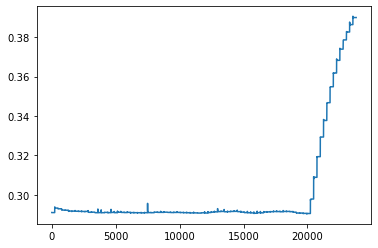

In [11]:
plt.plot(time, tmp)

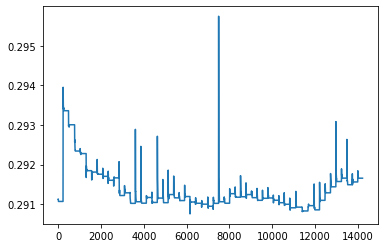

In [14]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 0
e = 3000
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [21]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [22]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  7,   9,  10,  43,  45,  79,  80, 115])

In [23]:
a = np.where(np.diff(rise)<10)[0]+1
a

array([1, 2, 4, 6])

In [24]:
start_indices = np.delete(rise, a)
start_indices

array([  7,  43,  79, 115])

In [27]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.round(start_indices + 5*60*conv).astype(dtype=np.int)

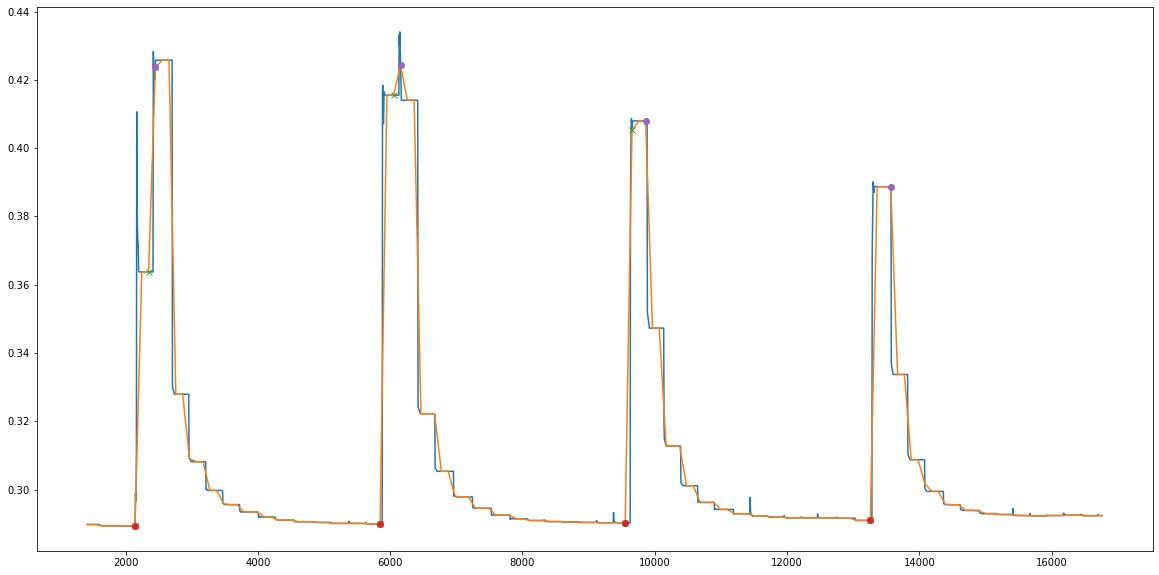

In [28]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')

In [29]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([134.25494386, 134.41573867, 117.67547248,  97.68316909])

In [32]:
az_v = np.linspace(2.15, 2.30, 4)
az_v

array([2.15, 2.2 , 2.25, 2.3 ])

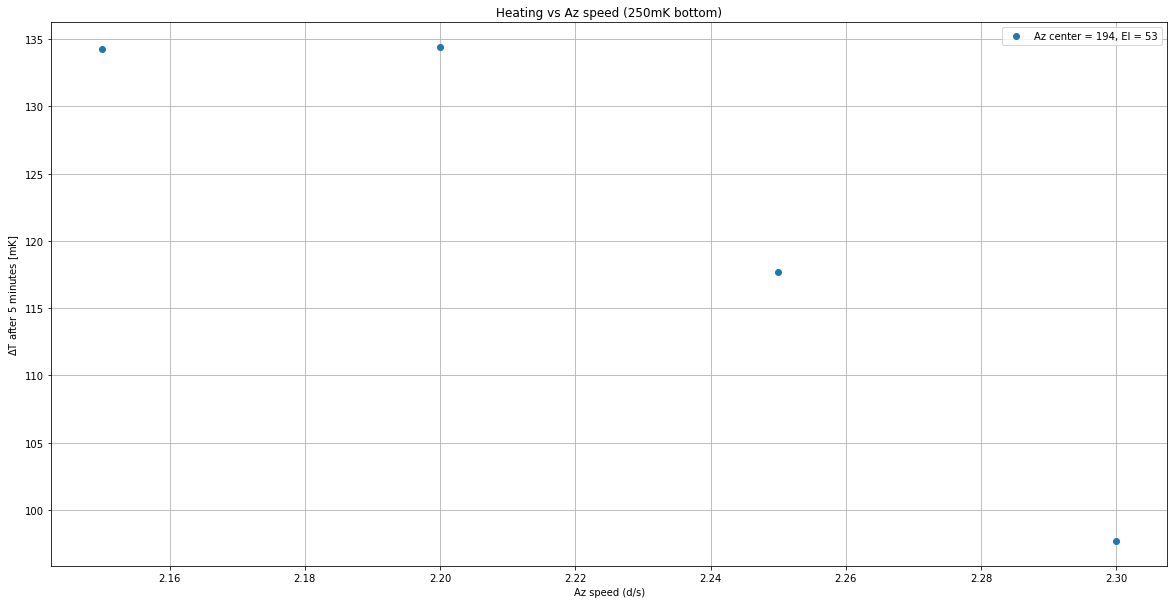

In [34]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 5 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()